In [1]:
#Add Matplotlib inline magic command
%matplotlib inline

#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
#outputs the first 10 row of the excel file 
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#For the city_Data_df,
#we need to get all the rows that contain null values,  
#make sure the driver_count column has an integer data type
#find out how many data points there are for each type of city 
#Get the columns and the rows not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#using df.count() to get the non null ones, this code shows there are 0 values in all 3 columns
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#We need to see if the driver_count column in excel has numerical data type we can perform math calculations
#get data types of each column
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [8]:
#We need to see how many data points there are for each type of city.
#we can use the unqiue() method which will return an array or list of all the unique values of that column
city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Use the sum() method on the city_data_df for the type column where the condition equals each city in the DF; 
#the typhe column where the condition = Urban, Suburban, Rural to get the # of DP for Urban cities
sum(city_data_df["type"]=="Urban")


66

In [10]:
#Get the number of data points from Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [11]:
#Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [12]:
#Get the columns and the rows not null; When you run it youll see the # for each column
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
#to check that there are no null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
#Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
#Merge DataFrames, review each DataFrames: city, driver_count, type vs city, data, fare, ride_id
#When we merge 2 DataFrames, we merge on a column with the same data, column name in both DataFrames
#Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#Display the Data Frame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
#Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"]== "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
#add the following code in a new cell and run the cell to create suburban_cities_df and the rural_cities_df
#Create the Suburban and Rural city DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df["type"] =="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] =="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
#Get the Number of Rides for Each City Type, we have to create a series where the index 
#is the name of the city and the column is the number of rides for that city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#To create a Data Series with 1 of the columns in a DF, we use the groupby() function and add the column
#apply the count() method to the Series for each city and select the ride_id column
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
#Create the suburban and rural ride count 
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
#Next, we'll use the groupby() function on the city type #DataFrames to get the average fare for each city type 
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()
#We now have one of 3 datasets we need to create a bubblechart.



city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [20]:
#Get average fare for eachc ity in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
#Get average fare for each city in the suburban and rural cities 
suburban_avg_Fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()


city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [22]:
suburban_avg_Fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [23]:
#Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [24]:
#Let us repurpose our code and change the variables to calculate the average # of drivers for suburban
#and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [25]:
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [26]:
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

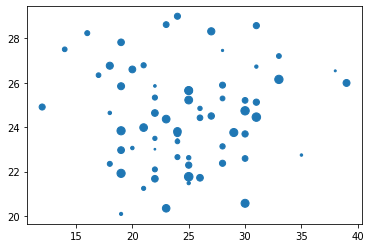

In [27]:
#Create a urban cities bubble chart using scatter plot and MATLAB method
# increase the size of the markers and add a label
plt.scatter(urban_ride_count, 
            urban_avg_fare, s=urban_driver_count) 
 

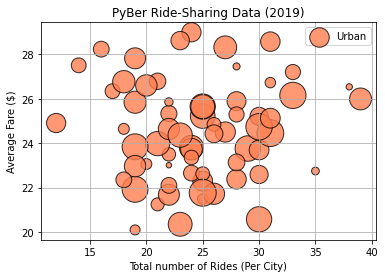

In [28]:
#Build the scatter plots for urban cities 
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral", alpha = 0.8, label= "Urban", edgecolors="black")
plt.title("PyBer Ride-Sharing Data (2019)")

#1) The x-axis is the number of rides for each city
plt.xlabel("Total number of Rides (Per City)")
#2) The y-axis is the average fare for each city
plt.ylabel("Average Fare ($)")
#3) The size of each marker is the average number of drivers in each city
plt.grid(True)

#Legend
plt.legend()

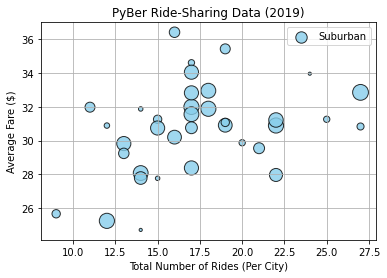

In [29]:
#Now Lets Create the SubUrban Cities Bubble Chart 
#Build the scatter plots for suburban cities 
plt.scatter(suburban_ride_count,
            suburban_avg_Fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

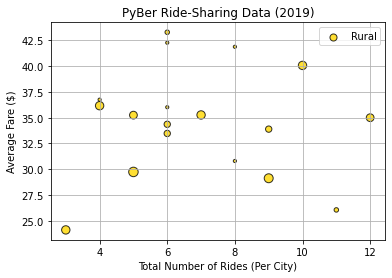

In [30]:
#Create the Rural Cities Bubble Chart - Start by building the scatter plots for rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c='gold',
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a Legend
plt.legend()

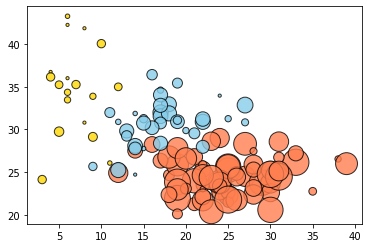

In [31]:
#Create a Bubble Chart for All Cities by combining our 3 scatter plot code blocks in one cell
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral", alpha = 0.8, label= "Urban", edgecolors="black")
plt.scatter(suburban_ride_count,
            suburban_avg_Fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c='gold',
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

#Show the plot
plt.show()

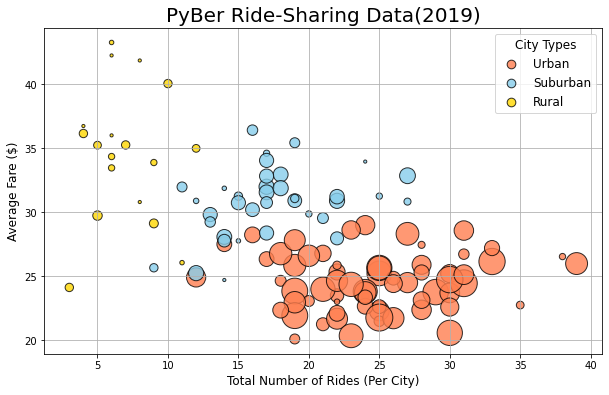

In [32]:
#Build the scatter charts for each city tupe 
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count,
            suburban_avg_Fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Rural")

#Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data(2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#Add the legend
plt.legend()
# sets the font size of the marker in the legend to a fixed size with fontsize=, expanded legend horizontally with mode to fit the area
#added the # of scatter points in legend for each marker to be 1, we can add multiple points by increasing number
lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")

#Set each marker in legend equal to 75-pt font by using attribute 
#and list indexing in brackets to reference one of 3 scatter plots
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75] 
lgnd.legendHandles[2]._sizes = [75]

#Increase font size of legend title
lgnd.get_title().set_fontsize(12)

#Show the plot
plt.show()



In [33]:
#We need to add a note to the right of the chart to let the viewer 
#know that the circle size correlates with the driver count for each city
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
#Save the figure
plt.savefig("Analysis/Fig1.png")

In [34]:
#Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [35]:
#shows total number, the average, the standard deviation, the max, min and 25, 50 and 75% quartiles
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
#Shows stats for suburban city
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
#stats for rural
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [38]:
#To get mean without complete summary stats, use the mean() method to get average ride count for each city type rounded to 2 decimal places
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
#To get median
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [40]:
#To get the mode 
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [41]:
#Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts
import statistics

In [42]:
#Calculate the measures of central tendency for the ride count of the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

#The mean and median values returned are the same values that were returned using describe(), mean(), median()
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

#With SciPy, the mode result thats returned is the mode that appears most frequently
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [43]:
#For Suburban cities, the mode returned is 
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [44]:
#For Rural cities, the mode returned would equate to
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [45]:
#Adds the following code to a new cell to create a Series with all the fares from the "fare"
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [46]:
#Calculating the mean, median and mode for the urban_fares, to get the mean and median we'll use NumPy
#To get mode, we'll use the SciPy - using mode returns how many times the mode appears in DS
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [47]:
rural_fares = rural_cities_df["fare"]
rural_fares.head()
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [48]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [49]:
#Need to create a Series for each city type based on driver_count column in each city type DataFrame
#Get the driver count data from the urban cities 
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [50]:
#Calculate the mean, median and mode for the urban, suburban, and rural driver count Series using NumPy and SciPy statistics module
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers in urban cities is ${mean_urban_drivers: .0f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban cities is ${median_urban_drivers: .0f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers in urban cities is {mode_urban_drivers}.")

The mean number of drivers in urban cities is $ 37.
The median number of drivers in urban cities is $ 37.
The mode number of drivers in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [51]:
#Get driver count for Suburban Cities
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [52]:
#Calculate the measures of central tendency for the driver counts of Suburban Cities 
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers in suburban cities is {mean_suburban_drivers: .0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers in suburban cities is {median_suburban_drivers: .0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers in suburban cities is {mode_suburban_drivers}.")

The mean number of drivers in suburban cities is  14.
The median number of drivers in suburban cities is  16.
The mode drivers in suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [53]:
# Get the driver counts for Rural Cities
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [54]:
# Calculate the measures of central tendency for the driver counts for Rural Cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers in suburban cities is {mean_rural_drivers: .0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in suburban cities is {median_rural_drivers: .0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers in suburban cities is {mode_rural_drivers}.")

The mean number of drivers in suburban cities is  4.
The median number of drivers in suburban cities is  4.
The mode drivers in suburban cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


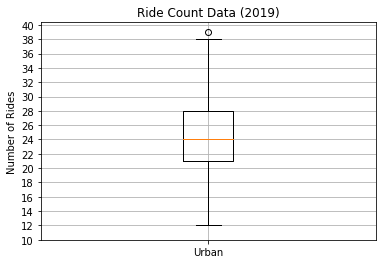

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [55]:
# Create a box-and-whisker plot for Urban Cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

plt.show()
print("Summary Statistics")
urban_fares.describe()

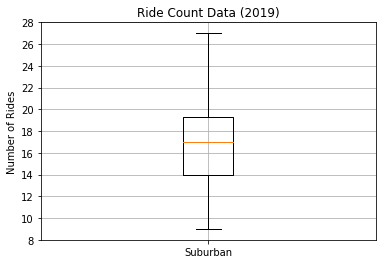

In [56]:
# Create a box-and-whisker plot for Suburban Cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(8, 30, step=2.0))
ax.grid()

plt.show()

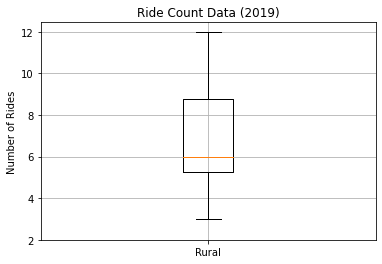

In [57]:
# Create a box-and-whisker plot for Rural Cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(2, 14, step=2.0))
ax.grid()

plt.show()

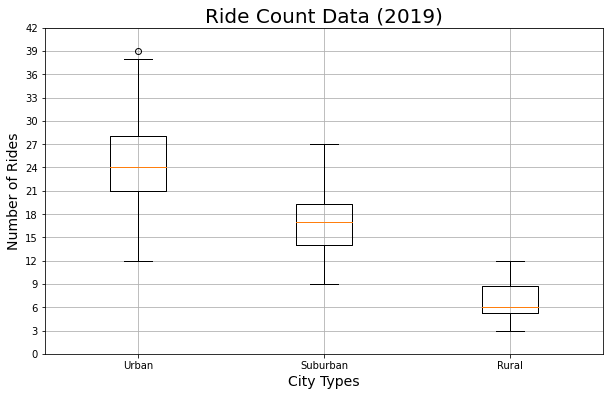

In [58]:
# Add all the ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("Analysis/Fig2.png")
plt.show()

In [59]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


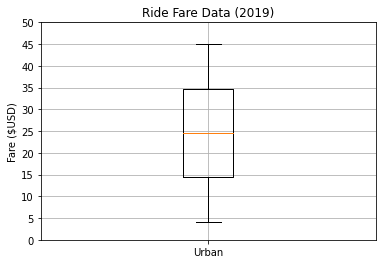

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [60]:
# Create a box-and-whisker plot for the Urban Fare data
x_label = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_label)

# Add the title, y-axis, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 55, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
urban_fares.describe()

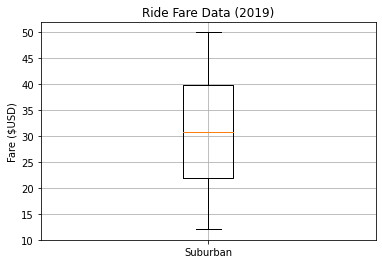

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [61]:
# Create a box-and-whisker plot for the Suburban Fare data
x_label = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_label)

# Add title, y-axis label, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10, 55, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
suburban_fares.describe()

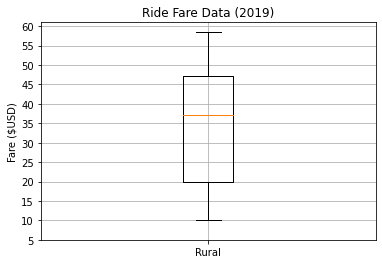

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [62]:
# Create a box-and-whisker plot for the Rural Fare Data
x_label = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_label)

# Add title, y-axis label, and grind
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(5, 65, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
rural_fares.describe()

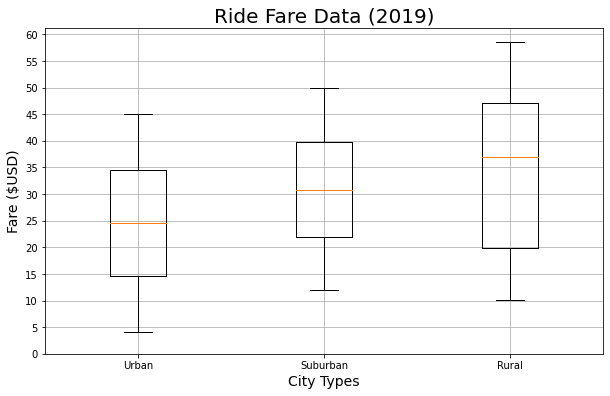

In [63]:
# Create a box-and-whisker plot that has all three city types' fare data
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()

# Save figure
plt.savefig("Analysis/Fig3.png")
plt.show()


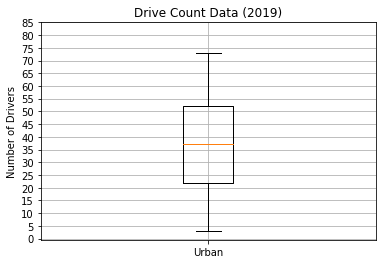

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [64]:
# Create a box-and-whisker plot for the urban driver count data
x_label = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_label)

# Add title, y-axis label, and grid
ax.set_title("Drive Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
urban_drivers.describe()

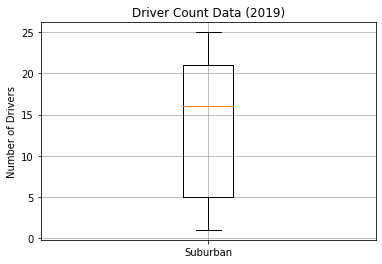

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [65]:
# Create a box-and-whiskers plot for the suburban driver count data
x_label = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_label)

# Add title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
suburban_drivers.describe()

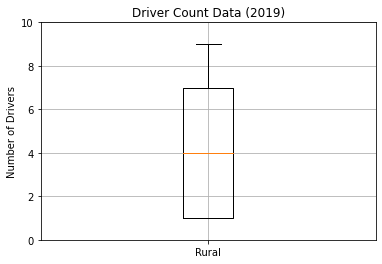

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [66]:
# Create a box-and-whiskers plot for the rural driver count data
x_label = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_label)

# Add title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 12, step=2.0))
ax.grid()

plt.show()
print("Summary Statistics")
rural_drivers.describe()

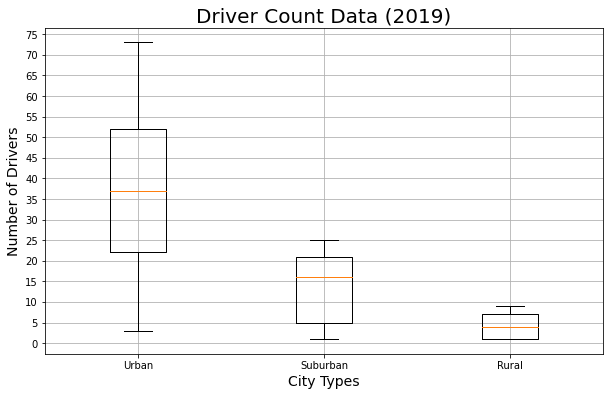

In [67]:
# Create a box-and-whiskers plot for the driver count data in all three city types
x_label = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(driver_data, labels=x_label)

ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

In [68]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [69]:
# Get the sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [70]:
# Calculate the percentage of total fares for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [71]:
# Another way to Calculate the percentage of fare for each city type in one line
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

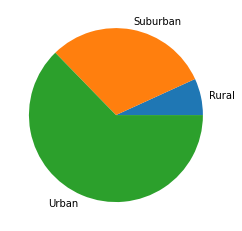

In [72]:
## You can perform the calculation in one line of code via 
#type_percents = 100*pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum()type_percents
# Build the percentage of fares pie chart
plt.pie(type_percents, labels = ["Rural", "Suburban", "Urban"])
plt.show()

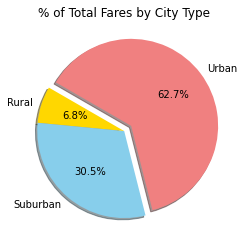

In [73]:
# Here are enhancing the basic pie through Adjustments: title, percentage, change in color, adding a shadow
#and adjusting the start angle
plt.pie(type_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "skyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

plt.show()

In [74]:
# There is no parameter for fontsize in piecharts like there is for scatter plots. Matplotlib has a way 
#to change the default parameters for charts by using the rcParams, which accesses the run and configure settings for
#Matplotlib parameters 
#To change the default paraments, we need to import the matplob lib

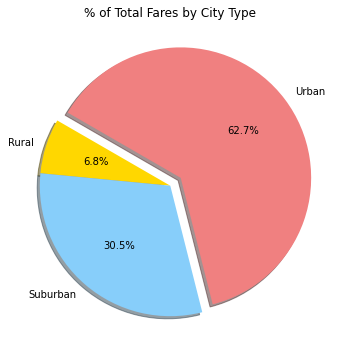

In [75]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl

# Build pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("Analysis/Fig5.png")

# Show figure
plt.show()

In [76]:
#Lets get the percentages of Total Rides for each City Type - get # of rides, total rides, percentage of total rides
#1 Calculate the percentage of rides for each city type
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

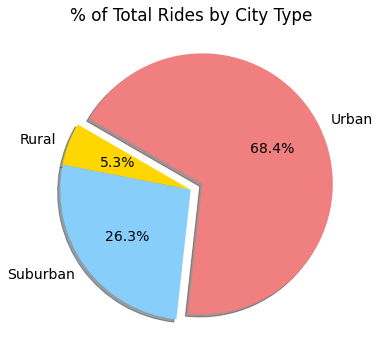

In [77]:
# Build the percentage of rides pie chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, 
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default front size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save image
plt.savefig("Analysis/Fig6.png")

# Show figure
plt.show()

In [78]:
#7.3 Get percentage of Total Drivers for each city - total number of drivers, total drivers, percentage
# Calculate the percentage of drivers for each city type
#driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
#driver_percents
pyber_data_df.groupby(["type"])
pyber_data_df.groupby(["type"])["ride_id"]
pyber_data_df["ride_id"].count()

2375

In [79]:
#Calculate the percentage of rides for each city type 
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

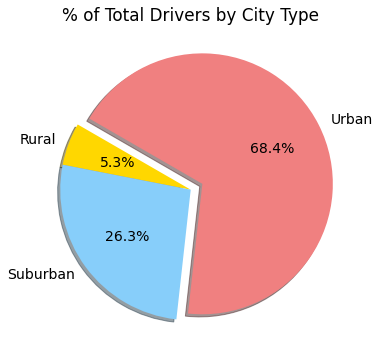

In [83]:
# Build the percentage of drivers pie chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Change the default size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("Analysis/Fig7.png")

# Show figure
plt.show()


In [81]:
driver_percents = 100*city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

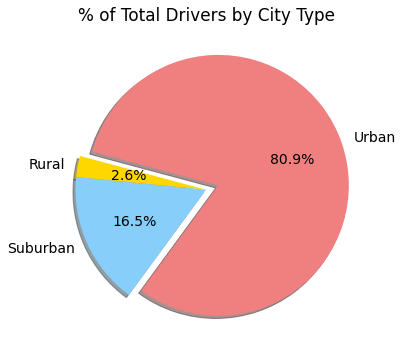

In [82]:
# Build the percentage of drivers pie chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Change the default size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("Analysis/Fig8.png")

# Show figure
plt.show()